<a href="https://colab.research.google.com/github/Surajkr1166/CODTECH-IT-SOLUTIONS-DATA-ANALYTICS-INTERNSHIP-TASKS-/blob/main/PREDICTIVE_MODELING_WITH_LINEAR_REGRESSION_TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [2]:
#upload the dataset from local device
from google.colab import files
uploaded_data = files.upload()

Saving house_price_regression_dataset.csv to house_price_regression_dataset.csv


In [3]:
#load the dataset
data = pd.read_csv('house_price_regression_dataset.csv',encoding = 'latin-1') #for encoding error

In [4]:
data.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [5]:
data.shape

(1000, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [7]:
#change the data type
data['Lot_Size'] = data['Lot_Size'].astype(int)
data['House_Price'] = data['House_Price'].astype(int)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Square_Footage        1000 non-null   int64
 1   Num_Bedrooms          1000 non-null   int64
 2   Num_Bathrooms         1000 non-null   int64
 3   Year_Built            1000 non-null   int64
 4   Lot_Size              1000 non-null   int64
 5   Garage_Size           1000 non-null   int64
 6   Neighborhood_Quality  1000 non-null   int64
 7   House_Price           1000 non-null   int64
dtypes: int64(8)
memory usage: 62.6 KB


In [9]:
data.isnull()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [10]:
data.isnull().sum()

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0


In [11]:
#Describe the dataset
data.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.248000,1.022000,5.615000,6.188605e+05
std,1255.514921,1.427564,0.820332,20.632916,1.313858,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.000000,0.000000,1.000000,1.116260e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.000000,0.000000,3.000000,4.016478e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.000000,1.000000,6.000000,6.282665e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.000000,2.000000,8.000000,8.271408e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.000000,2.000000,10.000000,1.108236e+06


In [12]:
#decribe the specific columns
data[['Square_Footage','House_Price']].describe()

,Square_Footage,House_Price
count,1000.000000,1.000000e+03
mean,2815.422000,6.188605e+05
std,1255.514921,2.535681e+05
min,503.000000,1.116260e+05
25%,1749.500000,4.016478e+05
50%,2862.500000,6.282665e+05
75%,3849.500000,8.271408e+05
max,4999.000000,1.108236e+06


In [13]:
#Select a feature and the target variable
X = data[['Square_Footage']]#feature
y = data['House_Price']#Target variable

In [16]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
#make prediction on the test set
y_pred = model.predict(X_test)

In [23]:
#evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [24]:
print(f"\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.4f}")



Model Evaluation Metrics:
Mean Squared Error (MSE): 1081485171.74
R-squared (R²): 0.9832


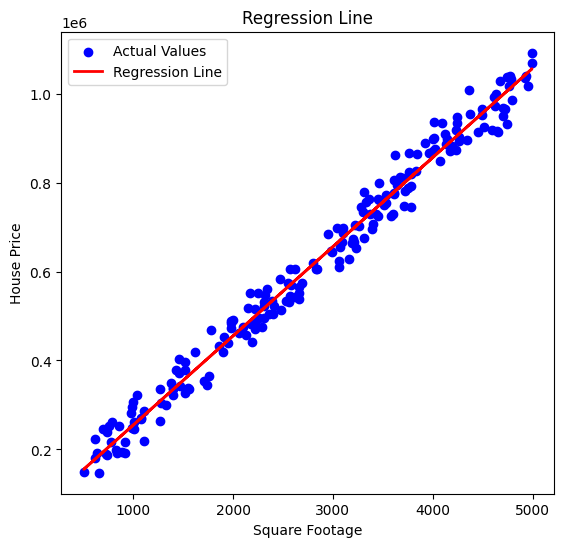

In [25]:
# Visualize the regression line
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Square Footage')
plt.ylabel('House Price')
plt.title('Regression Line')
plt.legend()


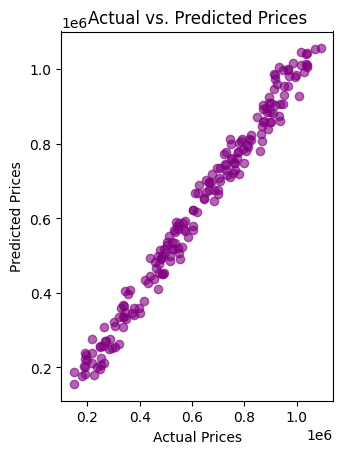

In [26]:
#Visualize the Actual vs predicted values
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, color='purple', alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')

plt.tight_layout()
plt.show()